### 데이터 불러오기

In [42]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data1 = pd.read_csv("ground_water_quality_2018_post.csv")
data2 = pd.read_csv("ground_water_quality_2019_post.csv")
data3 = pd.read_csv("ground_water_quality_2020_post.csv")

In [43]:
data3.drop('Unnamed: 8', axis=1, inplace=True)  # 비어있는 컬럼 삭제

In [44]:
# 컬럼명 맞추기
data2.columns = data1.columns
data3.columns = data1.columns

In [45]:
# 데이터 합친 후 reindex
data = pd.concat([data1, data2, data3], axis=0)
data.index = range(data.shape[0])
data

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.00,4.00,48.0,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.00,5.00,56.0,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.00,2.00,24.0,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.00,1.00,32.0,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.00,5.00,56.0,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,375,YADADRI,S.Narayanpur,S.Narayanpur,17.144719,78.860010,9.90,Post-monsoon 2020,7.8,2324,...,33.0,169.30,2.60,160.0,97.240,799.835526,2.602728,C4S1,-8.596711,P.S.
1102,376,YADADRI,Thurkapally,Gandamalla,17.733101,78.853831,5.74,Post-monsoon 2020,8.26,2109,...,33.0,211.30,43.30,48.0,116.688,599.802632,3.751176,C3S1,-3.396053,P.S.
1103,377,YADADRI,Valigonda,T. somaram,17.399953,78.952290,1.72,Post-monsoon 2020,8.77,1115,...,15.0,60.44,3.04,80.0,53.482,419.909539,1.282386,C3S1,-4.398191,P.S.
1104,378,YADADRI,Valigonda,Vemulakonda,17.347782,79.143433,1.65,Post-monsoon 2020,7.76,5053,...,109.0,465.20,3.30,400.0,92.378,1379.843750,5.444988,C4S1,-21.996875,P.S.


 **각 컬럼별 Null값 개수 확인**

In [46]:
data.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                  11
season                0
pH                    0
E.C                   0
TDS                   0
CO3                 160
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

gwl (ground water level) Null값 11개, CO3 Null값 160개

In [47]:
# gwl, CO3 각각 다른 컬럼과의 상관관계 탐색 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               1106 non-null   int64  
 1   district          1106 non-null   object 
 2   mandal            1106 non-null   object 
 3   village           1106 non-null   object 
 4   lat_gis           1106 non-null   float64
 5   long_gis          1106 non-null   float64
 6   gwl               1095 non-null   float64
 7   season            1106 non-null   object 
 8   pH                1106 non-null   object 
 9   E.C               1106 non-null   int64  
 10  TDS               1106 non-null   float64
 11  CO3               946 non-null    float64
 12  HCO3              1106 non-null   float64
 13  Cl                1106 non-null   int64  
 14  F                 1106 non-null   float64
 15  NO3               1106 non-null   float64
 16  SO4               1106 non-null   float64


In [48]:
# 숫자형 값인데 object type으로 되어있는 pH 컬럼 type 변경
data.loc[999, 'pH'] = "8.05"
data['pH'] = data['pH'].astype('float64')

In [49]:
# ind = data[data['gwl'].isnull() | data['CO3'].isnull()].index
# print(ind)

In [50]:
data.corr()['gwl']

sno              0.121790
lat_gis         -0.077241
long_gis        -0.228986
gwl              1.000000
pH              -0.104560
E.C             -0.032740
TDS             -0.032740
CO3             -0.028910
HCO3            -0.007824
Cl              -0.026457
F                0.068213
NO3             -0.000483
SO4             -0.133135
Na              -0.082886
K               -0.063463
Ca               0.045627
Mg              -0.021886
T.H              0.014397
SAR             -0.069024
RSC  meq  / L   -0.021590
Name: gwl, dtype: float64

gwl은 다른 컬럼들과 상관성이 거의 없음<br>
따라서 gwl의 평균값으로 Null값을 채움

In [51]:
data['gwl'].fillna(data['gwl'].mean(),inplace=True)

In [52]:
data.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   0
season                0
pH                    0
E.C                   0
TDS                   0
CO3                 160
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [53]:
data.corr()['CO3']

sno             -0.042642
lat_gis         -0.165900
long_gis         0.046555
gwl             -0.028548
pH               0.576520
E.C             -0.076437
TDS             -0.076437
CO3              1.000000
HCO3            -0.039647
Cl              -0.110447
F                0.191556
NO3             -0.091382
SO4             -0.044441
Na               0.102308
K               -0.017172
Ca              -0.223167
Mg              -0.123764
T.H             -0.211227
SAR              0.243574
RSC  meq  / L    0.271018
Name: CO3, dtype: float64

pH 컬럼과 양의 상관관계가 있음(0.57628413)<br>
따라서 같은 pH값을 갖는 행들의 CO3 평균값으로 Null값을 채움

In [54]:
ind = data[data['CO3'].isnull()].index
print(ind)

Int64Index([383, 384, 387, 388, 389, 390, 391, 392, 394, 395,
            ...
            688, 689, 690, 691, 692, 693, 694, 695, 696, 697],
           dtype='int64', length=160)


In [55]:
import math

for i in ind:
    data.loc[i, 'CO3'] = (data['CO3'][data['pH']==data.loc[i, 'pH']]).mean()
    if math.isnan(data.loc[i, 'CO3']):
        data.loc[i, 'CO3'] = (data['CO3'][(data.loc[i, 'pH'] - 0.05 <= data['pH']) & (data['pH'] <= data.loc[i, 'pH'] + 0.05)]).mean()
    if math.isnan(data.loc[i, 'CO3']):
        data.loc[i, 'CO3'] = 0

In [56]:
data.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 0
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

**범주형 변수 (season 컬럼) one-hot encoding**

In [57]:
data.head()

# 불필요한 컬럼과 target 컬럼 제외한 설계행렬
X_features = data.drop(['sno', 'district', 'mandal', 'village', 'Classification', 'RSC  meq  / L', 'Classification.1'], axis=1, inplace=False)
X_features

,lat_gis,long_gis,gwl,season,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR
0,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,476.80,0.0,220.0,60,0.44,42.276818,46.0,49.00,4.00,48.0,38.896,279.934211,1.273328
1,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,589.44,0.0,230.0,80,0.56,100.659091,68.0,42.00,5.00,56.0,63.206,399.893092,0.913166
2,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,326.40,0.0,200.0,30,0.66,41.471545,44.0,45.00,2.00,24.0,38.896,219.934211,1.319284
3,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,270.08,0.0,160.0,10,0.58,10.669864,35.0,27.00,1.00,32.0,19.448,159.967105,0.928155
4,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,1485.44,0.0,300.0,340,2.56,128.843636,280.0,298.00,5.00,56.0,92.378,519.843750,5.682664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,17.144719,78.860010,9.90,Post-monsoon 2020,7.80,2324,1487.36,0.0,370.0,370,0.58,336.161100,33.0,169.30,2.60,160.0,97.240,799.835526,2.602728
1102,17.733101,78.853831,5.74,Post-monsoon 2020,8.26,2109,1349.76,0.0,430.0,260,1.08,332.175000,33.0,211.30,43.30,48.0,116.688,599.802632,3.751176
1103,17.399953,78.952290,1.72,Post-monsoon 2020,8.77,1115,713.60,20.0,180.0,220,0.34,44.201420,15.0,60.44,3.04,80.0,53.482,419.909539,1.282386
1104,17.347782,79.143433,1.65,Post-monsoon 2020,7.76,5053,3233.92,0.0,280.0,1360,0.44,76.355960,109.0,465.20,3.30,400.0,92.378,1379.843750,5.444988


In [58]:
X_features = pd.get_dummies(X_features)
X_features.columns

Index(['lat_gis', 'long_gis', 'gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl',
       'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR',
       'season_Post-monsoon 2020', 'season_post monsoon 2019',
       'season_postmonsoon 2018 '],
      dtype='object')

In [59]:
X_features

,lat_gis,long_gis,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,...,SO4,Na,K,Ca,Mg,T.H,SAR,season_Post-monsoon 2020,season_post monsoon 2019,season_postmonsoon 2018
0,19.668300,78.524700,5.09,8.28,745,476.80,0.0,220.0,60,0.44,...,46.0,49.00,4.00,48.0,38.896,279.934211,1.273328,0,0,1
1,19.458888,78.350833,5.10,8.29,921,589.44,0.0,230.0,80,0.56,...,68.0,42.00,5.00,56.0,63.206,399.893092,0.913166,0,0,1
2,19.525555,78.512222,4.98,7.69,510,326.40,0.0,200.0,30,0.66,...,44.0,45.00,2.00,24.0,38.896,219.934211,1.319284,0,0,1
3,19.730555,78.640000,5.75,8.09,422,270.08,0.0,160.0,10,0.58,...,35.0,27.00,1.00,32.0,19.448,159.967105,0.928155,0,0,1
4,19.495665,78.852654,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,...,280.0,298.00,5.00,56.0,92.378,519.843750,5.682664,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,17.144719,78.860010,9.90,7.80,2324,1487.36,0.0,370.0,370,0.58,...,33.0,169.30,2.60,160.0,97.240,799.835526,2.602728,1,0,0
1102,17.733101,78.853831,5.74,8.26,2109,1349.76,0.0,430.0,260,1.08,...,33.0,211.30,43.30,48.0,116.688,599.802632,3.751176,1,0,0
1103,17.399953,78.952290,1.72,8.77,1115,713.60,20.0,180.0,220,0.34,...,15.0,60.44,3.04,80.0,53.482,419.909539,1.282386,1,0,0
1104,17.347782,79.143433,1.65,7.76,5053,3233.92,0.0,280.0,1360,0.44,...,109.0,465.20,3.30,400.0,92.378,1379.843750,5.444988,1,0,0


**Target 컬럼**
* Classification 컬럼: C3S1, C2S1, C4S1, C4S2, C3S2, C4S4, C3S3, C1S1 등 9개 등급으로 분류되는 수질 예측에 사용됨
* Classification.1 컬럼: RSC에 의한 분류, RSC는 알칼리성을 초과하는 탄산염과 중탄산염의 양으로 정의됨

**RSC값과 TDS값 컬럼** <br>
<br>
< RSC에 의한 지하수 분류 >
* RSC < 1.25 -- safe --
* 1.25 <= RSC <= 2.50 -- marginal --
* 2.50 < RSC -- unsuitable --

< 가축 및 가금류에 대한 지하수 이용 >
* TDS < 1000 mg/L -- Excellent -- 
* TDS b/w 1000-3000 -- very satisfactory --
* TDS b/w 3000-5000 -- Satisfactory for livestock Unfit for poultry -- 
* TDS b/w 5000-7000 -- Limited use for livestock Unfit for poultry -- 
* TDS b/w 7000-10,000 -- Very limited use -- 
* TDS > 10,000 -- Not recommended -- 

In [60]:
y_target1 = data.iloc[:, 23]
y_target2 = data.iloc[:, 25]
print(y_target1)
print(y_target2)

0       C2S1
1       C3S1
2       C2S1
3       C2S1
4       C4S2
        ... 
1101    C4S1
1102    C3S1
1103    C3S1
1104    C4S1
1105    C4S1
Name: Classification, Length: 1106, dtype: object
0       P.S.
1       P.S.
2       P.S.
3       P.S.
4       P.S.
        ... 
1101    P.S.
1102    P.S.
1103    P.S.
1104    P.S.
1105    P.S.
Name: Classification.1, Length: 1106, dtype: object


### Classification ( C3S1, C2S1, C4S1, C4S2, C3S2, C4S4, C3S3, C1S1 ) 분류

**PCA 수행을 위해 데이터 scaling**

In [61]:
data_ohe = X_features.copy()
data_ohe['RSC'] = data.iloc[:, 24]
data_ohe['Classification1'] = data.iloc[:, 23]
data_ohe['Classification2'] = data.iloc[:, 25]
data_ohe = data_ohe[['lat_gis', 'long_gis', 'gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl',
       'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC',
       'season_Post-monsoon 2020', 'season_post monsoon 2019',
       'season_postmonsoon 2018 ', 'Classification1',
       'Classification2']]
data_ohe

,lat_gis,long_gis,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,...,Ca,Mg,T.H,SAR,RSC,season_Post-monsoon 2020,season_post monsoon 2019,season_postmonsoon 2018,Classification1,Classification2
0,19.668300,78.524700,5.09,8.28,745,476.80,0.0,220.0,60,0.44,...,48.0,38.896,279.934211,1.273328,-1.198684,0,0,1,C2S1,P.S.
1,19.458888,78.350833,5.10,8.29,921,589.44,0.0,230.0,80,0.56,...,56.0,63.206,399.893092,0.913166,-3.397862,0,0,1,C3S1,P.S.
2,19.525555,78.512222,4.98,7.69,510,326.40,0.0,200.0,30,0.66,...,24.0,38.896,219.934211,1.319284,-0.398684,0,0,1,C2S1,P.S.
3,19.730555,78.640000,5.75,8.09,422,270.08,0.0,160.0,10,0.58,...,32.0,19.448,159.967105,0.928155,0.000658,0,0,1,C2S1,P.S.
4,19.495665,78.852654,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,...,56.0,92.378,519.843750,5.682664,-4.396875,0,0,1,C4S2,P.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,17.144719,78.860010,9.90,7.80,2324,1487.36,0.0,370.0,370,0.58,...,160.0,97.240,799.835526,2.602728,-8.596711,1,0,0,C4S1,P.S.
1102,17.733101,78.853831,5.74,8.26,2109,1349.76,0.0,430.0,260,1.08,...,48.0,116.688,599.802632,3.751176,-3.396053,1,0,0,C3S1,P.S.
1103,17.399953,78.952290,1.72,8.77,1115,713.60,20.0,180.0,220,0.34,...,80.0,53.482,419.909539,1.282386,-4.398191,1,0,0,C3S1,P.S.
1104,17.347782,79.143433,1.65,7.76,5053,3233.92,0.0,280.0,1360,0.44,...,400.0,92.378,1379.843750,5.444988,-21.996875,1,0,0,C4S1,P.S.


In [62]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(data_ohe.iloc[:, :19])

In [63]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.298941,-0.325420,-0.467696,0.942173,-0.717159,-0.717159,-0.367023,-0.597892,-0.669591,-0.865088,-0.336689,0.106131,-0.657005,-0.184979,-0.553204,-0.310241,-0.527881,-0.529633,0.213044
1,2.053290,-0.537968,-0.466359,0.964065,-0.512668,-0.512668,-0.367023,-0.523851,-0.569844,-0.711785,0.262650,0.513042,-0.718522,-0.136691,-0.429432,0.309979,-0.073181,-0.657223,-0.231752
2,2.131493,-0.340674,-0.482393,-0.349489,-0.990202,-0.990202,-0.367023,-0.745973,-0.819210,-0.584032,-0.344956,0.069139,-0.692158,-0.281554,-0.924521,-0.310241,-0.755308,-0.513353,0.374849
3,2.371969,-0.184468,-0.379512,0.526214,-1.092447,-1.092447,-0.367023,-1.042137,-0.918957,-0.686234,-0.661158,-0.097325,-0.850345,-0.329842,-0.800748,-0.806417,-0.982611,-0.651913,0.455618
4,2.096431,0.075496,-0.860514,0.788925,1.113969,1.113969,-0.367023,-0.005564,0.726859,1.843265,0.551985,4.434187,1.531261,-0.136691,-0.429432,1.054243,0.381487,1.032406,-0.433808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,-0.661348,0.084489,0.174976,-0.108671,1.117454,1.117454,-0.367023,0.512722,0.876479,-0.686234,2.680257,-0.134317,0.400217,-0.252582,1.179608,1.178287,1.442785,-0.058684,-1.283249
1102,0.028854,0.076935,-0.380848,0.898387,0.867649,0.867649,-0.367023,0.956967,0.327873,-0.047472,2.639337,-0.134317,0.769323,1.712733,-0.553204,1.674463,0.684568,0.348162,-0.231386
1103,-0.361945,0.197299,-0.917967,2.014909,-0.287262,-0.287262,0.874291,-0.894055,0.128381,-0.992840,-0.316931,-0.467244,-0.556468,-0.231335,-0.058115,0.061891,0.002690,-0.526424,-0.434074
1104,-0.423145,0.430967,-0.927319,-0.196241,4.288233,4.288233,-0.367023,-0.153646,5.813925,-0.865088,0.013159,1.271377,3.000650,-0.218780,4.892776,1.054243,3.641283,0.948207,-3.993509


**PCA 변환 (범주형 변수 제외)** <br>
시각화를 위해 component 개수 2로 설정

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_pca.shape)

(1106, 2)


In [65]:
data_pca = pd.DataFrame(X_pca, columns=['component1', 'component2'])
data_pca['target'] = data_ohe['Classification1']
data_pca.head()

,component1,component2,target
0,-2.021253,-0.627400,C2S1
1,-1.121287,-0.920918,C3S1
2,-2.410542,-0.837599,C2S1
3,-3.079971,-0.744413,C2S1
4,2.628757,2.105688,C4S2


**시각화**

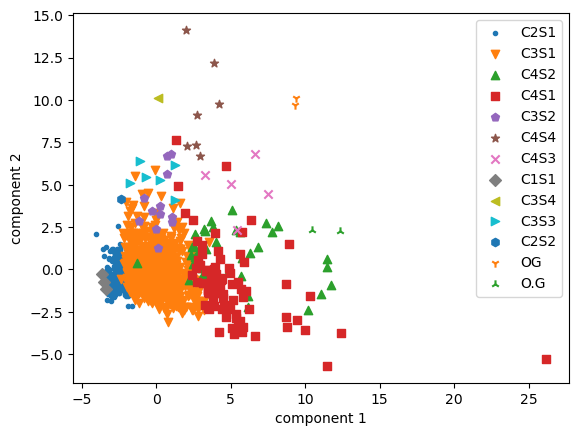

In [66]:
import matplotlib.pyplot as plt
cl = data['Classification'].unique()
length = len(data['Classification'].unique())
markers = ['.', 'v', '^', 's', 'p', '*', 'x', 'D', '<', '>', 'h', '1', '2']

for i in range(length):
    x_axis = data_pca[data_pca['target']==cl[i]]['component1']
    y_axis = data_pca[data_pca['target']==cl[i]]['component2']
    plt.scatter(x_axis, y_axis, marker=markers[i], label=cl[i])

plt.legend()
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

원본 데이터와 PCA 변환 데이터 예측 성능 비교 (RandomForestClassifier 이용)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=100)
scores = cross_val_score(rcf, data_ohe.iloc[:, :22], data_ohe['Classification1'],
                        scoring='accuracy', cv=3)

print('원본 데이터 CV accuracy:', scores)
print('원본 데이터 CV 평균 accuracy:', np.mean(scores))


원본 데이터 CV accuracy: [0.95663957 0.95121951 0.95108696]
원본 데이터 CV 평균 accuracy: 0.952982011704175


In [68]:
pca_X = pd.concat([data_ohe[['season_Post-monsoon 2020', 'season_post monsoon 2019',
       'season_postmonsoon 2018 ']], data_pca[['component1', 'component2']]], axis=1)
scores_pca = cross_val_score(rcf, pca_X, data_pca['target'], scoring='accuracy', cv=3 )
print('PCA 변환 데이터 CV accuracy:',scores_pca)
print('PCA 변환 데이터 CV 평균 accuracy:', np.mean(scores_pca))

PCA 변환 데이터 CV accuracy: [0.71273713 0.68563686 0.375     ]
PCA 변환 데이터 CV 평균 accuracy: 0.5911246612466124


components의 개수가 2인 경우 예측 성능이 매우 떨어지므로 components의 개수에 따른 예측 성능 비교 (6개가 적당함)

In [69]:
for i in range(11):
    pca = PCA(n_components=i)

    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    data_pca = pd.DataFrame(X_pca)
    data_pca

    pca_X = pd.concat([data_ohe[['season_Post-monsoon 2020', 'season_post monsoon 2019',
           'season_postmonsoon 2018 ']], data_pca], axis=1)
    scores_pca = cross_val_score(rcf, pca_X, data_ohe['Classification1'], scoring='accuracy', cv=3)
    print('Component 개수:', i)
    print('PCA 변환 데이터 CV accuracy:', scores_pca)
    print('PCA 변환 데이터 CV 평균 accuracy:', np.mean(scores_pca))
    print('')

Component 개수: 0
PCA 변환 데이터 CV accuracy: [0.22493225 0.07588076 0.08967391]
PCA 변환 데이터 CV 평균 accuracy: 0.13016230705785317

Component 개수: 1
PCA 변환 데이터 CV accuracy: [0.50135501 0.66124661 0.27717391]
PCA 변환 데이터 CV 평균 accuracy: 0.4799251796865795

Component 개수: 2
PCA 변환 데이터 CV accuracy: [0.71273713 0.68563686 0.375     ]
PCA 변환 데이터 CV 평균 accuracy: 0.5911246612466124

Component 개수: 3
PCA 변환 데이터 CV accuracy: [0.8401084  0.85907859 0.875     ]
PCA 변환 데이터 CV 평균 accuracy: 0.8580623306233063

Component 개수: 4
PCA 변환 데이터 CV accuracy: [0.84281843 0.83739837 0.75543478]
PCA 변환 데이터 CV 평균 accuracy: 0.8118838615922391

Component 개수: 5
PCA 변환 데이터 CV accuracy: [0.87262873 0.8699187  0.8451087 ]
PCA 변환 데이터 CV 평균 accuracy: 0.8625520403754762

Component 개수: 6
PCA 변환 데이터 CV accuracy: [0.91056911 0.88346883 0.88858696]
PCA 변환 데이터 CV 평균 accuracy: 0.8942082989670476

Component 개수: 7
PCA 변환 데이터 CV accuracy: [0.90243902 0.87804878 0.89402174]
PCA 변환 데이터 CV 평균 accuracy: 0.8915031813361612

Component 개수: 8
PCA 변환 

PCA 변환을 하는 경우 components의 개수는 6개가 적당하지만, 이는 시각화 측면에서 유리하지 않으며, <br>
성능면에서도 PCA 변환 데이터보다 원본 데이터를 이용하는 것이 우수하므로 PCA 변환을 적용하는 것이 바람직하지 않음 <br>
(원본 데이터보다 PCA 변환 데이터가 성능이 더 좋은 경우는 feature들 간의 상관관계가 높은 다중공선성 문제가 있는 경우)

**Random Forest**

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=100)
scores = cross_val_score(rfc, data_ohe.iloc[:, :22], data_ohe['Classification1'],
                        scoring='accuracy', cv=3)

print('Random Forest CV accuracy:', scores)
print('Random Forest CV 평균 accuracy:', np.mean(scores))


Random Forest CV accuracy: [0.95663957 0.95121951 0.95108696]
Random Forest CV 평균 accuracy: 0.952982011704175


In [143]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_ohe.iloc[:, :22], data_ohe['Classification1'],
                                                   test_size=0.2, random_state=100)
rfc = RandomForestClassifier(random_state=100)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Random Forest Classifier Accuracy: {0:.4f}'.format(accuracy))

Random Forest Classifier Accuracy: 0.9595


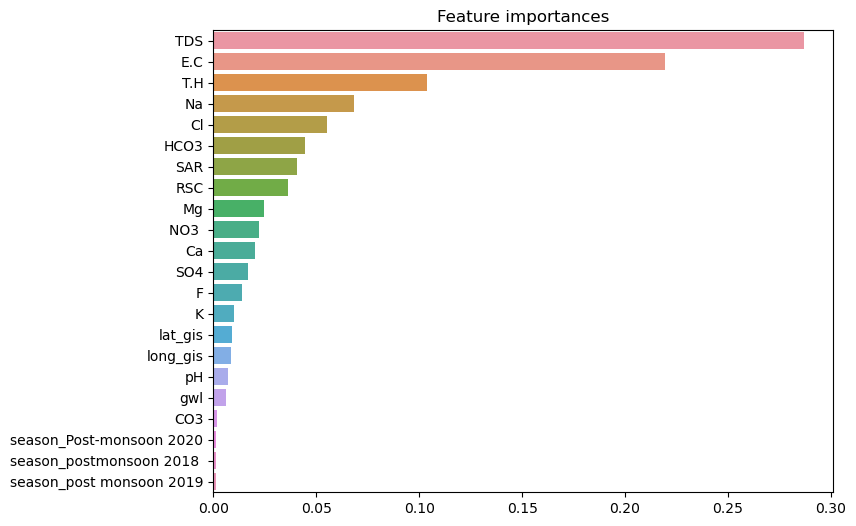

In [72]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)
plt.show()

**XGBoost**

In [137]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_ohe['Classification1'] = le.fit_transform(data_ohe['Classification1'])

X_train, X_test, y_train, y_test = train_test_split(data_ohe.iloc[:, :22], data_ohe['Classification1'],
                                                   test_size=0.2, random_state=100)


In [140]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.01, max_depth=3)
xgb.fit(X_train, y_train, verbose=True)
pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('XGBoost Classifier Accuracy: {0:.4f}'.format(accuracy))

XGBoost Classifier Accuracy: 0.9550
